# Part 1 - Theory Questions

## k-Nearest Neighbor Classification

### 1- Assume that you have a large training dataset. Specify a disadvantage of the k-Nearest Neighbor method when using it during testing. State also your reason about your answer.

Well, since kNN algorithm is a computationally expensive instance-based algorithm its performance solely depends on the dataset size and dimensionality. Merely any training happens with this algorithm, most of the work is done at the test stage. During this stage, the distance between every instance is calculated, which can take quite a lot time with large datasets. This algorithm also suffers from the curse of dimensionality. Since we need to calculate the distance between instances, we get less meaningful calculations as the dimensionality increases.

---

### 2- Considering the image below, state an optimal k-value depending on that the algorithm you are using is k-Nearest Neighbor. State also your reason behind the optimal value you preferred.

We can tolerate some training error, but we want the test error as low as it can be without encountering overfitting kind of issues. Examining the images, we see that the training error constantly increase with a decreasing acceleration, while the test error decreasing up to a certain k-value, but then increasing with a steady pace. Around the k-value 10, seems the sweet spot. But since this is a kNN algorithm, we might want to choose k-value as an odd value, to avoid ties when voting for the nearest neighbors. Choosing an odd k-value ensures that there is a clear majority class among the neighbors.

---

### 3- One of the problems with k-nearest neighbor learning is how to select a value for k. Say you are given the following data set. This is a binary classification task in which the instances are described by two real-valued attributes (+ and - denote positive and negative classes, respectively). 

### Data points are: Negative: (1, 1) (3, 1) (1, 4) Positive: (2, 4) (3, 3) (5, 1). Data points are classified as either +1 or -1. An unknown point is located at (2, 3).
- Draw the 1-NN decision boundaries on the graph above.
- How would 1-NN classify the unknown point (2, 3).
- What is the minimum value of k for the unknown value be negative?
- Explain the effects of the smaller and larger value of k?

#### 3.1- Drawing the 1-NN decision boundary. 
To do that, I thought of using matplotlib, so it will be a better visualization.

In [ ]:
%pip install numpy
%pip install matplotlib

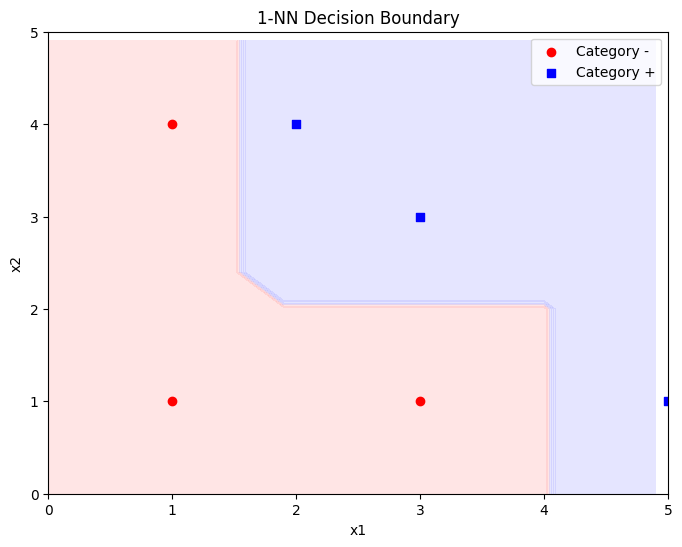

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

data_points = np.array([
    [1, 1],
    [3, 1],
    [5, 1],
    [3, 3],
    [1, 4],
    [2, 4]
])
categories = np.array(['-', '-', '+', '+', '-', '+'])

category_map = {'-': 0, '+': 1}
num_categories = np.array([category_map[cat] for cat in categories])

xx, yy = np.meshgrid(np.arange(0, 5, 0.1),
                     np.arange(0, 5, 0.1))

def find_nearest_neighbor(point, data_points, numerical_categories):
    distances = np.linalg.norm(data_points - point, axis=1)
    nearest_index = np.argmin(distances)
    return numerical_categories[nearest_index]

Z = np.array([find_nearest_neighbor(np.array([x, y]), data_points, num_categories)
              for x, y in zip(xx.ravel(), yy.ravel())])

Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

for category, marker, color in zip([0, 1], ['o', 's'], ['red', 'blue']):
    plt.scatter(data_points[num_categories == category][:, 0],
                data_points[num_categories == category][:, 1],
                marker=marker, color=color, label=f'Category {list(category_map.keys())[category]}')

plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('1-NN Decision Boundary')
plt.show()

---

#### 3.2- How would 1-NN classify the unknown point (2, 3).

As we can observe using the decision boundary, point (2, 3) would be classified as "+".

---

#### 3.3- What is the minimum value of k for the unknown value be negative?

Well, if we were to examine the nearest neighbors to the unknown point and their categories (let's say using the Manhattan distance for the sake of simplicity), we would achieve this list:

| Data Point | Distance | Category |
|------------|----------| -------- |
| (2, 4)     | 1        | +        |
| (3, 3)     | 1        | +        |
| (1, 4)     | 2        | -        |
| (1, 1)     | 3        | -        |
| (3, 1)     | 3        | -        |
| (5, 1)     | 5        | +        |

Observing this table, we would need k to be 5 so that the unknown point would be classified as "-".

---

#### 3.4- Explain the effects of the smaller and larger value of k?

Well, the difference between smaller and larger k values actually implies the million-dollar question in ML: Bias-Variance Trade-off.

Smaller k value would cause a more complex decision boundary, as we can observe from the plot of 1-NN decision boundary. With a small value of k, the model would also capture the noise, which may cause overfitting issues.

On the other hand, a larger k value would increase the bias but also create a simpler, smoother decision boundary. Increase of bias may cause decrease in variance but again, it's soemething we must consider.

All in all, it's the same old bias-variance trade-off again. 

---

### 4- Fill the blanks with T (True) or F (False) for the statements below:

- Computational complexity of the training is higher than testing in kNN. (<span style="color: red;">F</span>) <span style="color: red;">*Merely any training happens.</span>
- Scaling the dataset increases the performance of kNN extraordinarily. (<span style="color: red;">T</span>) <span style="color: red;">*Scaling would increase the performance since it is a distance-based algorithm but to be honest "extraordinarily" part made me think.</span>
- kNN has no idea of the functional form of the problem that it solves. (<span style="color: red;">T</span>) <span style="color: red;">*It doesn't "learn" anything, it is a non-parametric algorithm.</span>
- There is no difference between Euclidian Distance and Manhattan Distance for
kNN while calculating the distance. (<span style="color: red;">F</span>) <span style="color: red;">*Hard false. They have diferent formulas and make quite the change especially in high dimensional spaces.</span>

---

## Linear Regression

### 1- Suppose we have trained a linear regression model y = ax+b where a = 1.5 and b = 1.0, on a set of training data points D=(1.0, 1.5),(1.5, 3.25),(3.0, 4.0). Please calculate the mean squared errors of this model on D.

The function is:
$$
y = 1.5x + 1.0
$$

For data points $1.0, 1.5, 3.0$, predictions are $2.5, 3.25, 5.5$ respectively.

Considering the fact that MSE formula is:
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
and the actual targets are $1.5, 3.25, 4.0$ respectively, the MSE is:
$$
\frac{1}{n} [(1.5 - 2.5)^2 + (3.25 - 3.25)^2 + (4.0 - 5.5)^2] = 3.25
$$

---

### 2- Answer the questions according the figure below: These questions pertains to the scatter plot above which shows the midterm and final exam scores of 107 students.

#### 2.1- Which is the regression line?

I think Line 2 is the regression line because it covers all Midterm Score (x) values for the data, whereas Line 1 actually gives no prediction for Midterm Score values less than 50.

---

#### 2.2- Look at students A, B, C and D on the graph. How did their actual scores on the final compare to their predicted scores?

- **A**: Actually got a lot better Final Score with respect to their Midterm Score value.
- **B**: Is quite close.
- **C**: Exactly on the Line 2. 
- **D**: Close enough to Line 2.

---

### 3- Considering the figure below, which of the offsets used in linear regressions least square line fit? Assume that horizontal axis represents independent variable and vertical axis represents dependent variable. State your answer with your proper explanation.


Vertical offsets are used. When we think of the formula, 
$$ \text{Minimize} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$
we observe that we deduct $\hat{y}$ from the actual target value, on the vertical (target) axis. 

---

### 4- Considering the table below, consisting of four training examples:
| x | y |
|---|--- |
| 3 | 9  |      
| 1.5 | 6    |    
| 2 | 7       | 
| -2 | -1  |

### Assume that you are trying to fit the data above to the linear regression model $f_θ(x) = θ_0 + θ_1x_1$. Find the $θ_0$ and $θ_1$ values by using closed form solution $(θ = (X^T X)^{-1} X^T y)$. Also state dimension values of $X$, $y$, and $θ$ matrices. Finally, show your calculations step by step.

First, we should create $X$ matrix because it does not include the intercept term $θ_0$ as it is now. To do that, we can simply add a lower-order term to the input matrix, a ones column.
$$
X = \begin{bmatrix}
1 & 3 \\
1 & 1.5 \\
1 & 2 \\
1 & -2 
\end{bmatrix}
$$

And $y$ matrix is:
$$
y = \begin{bmatrix}
0 \\
6 \\
7 \\
-1 
\end{bmatrix}
$$

Here we can observe shapes of $X$ and $y$ matrices, $4x2$ and $4x1$, respectively.

Now we should calculate $(X^T X)$:
$$
(X^T X) = 
\begin{bmatrix}
1 & 1 & 1 & 1 \\ 
3 & 1.5 & 2 & -2
\end{bmatrix}
\text{X}
\begin{bmatrix}
1 & 3 \\
1 & 1.5 \\
1 & 2 \\
1 & -2 
\end{bmatrix}
$$
$$
=
\begin{bmatrix}
4 & 4.5   \\ 
4.5 & 19.25 
\end{bmatrix}
$$

Next step is finding the inverse of the last calculation:
$$
(X^T X)^{-1} = 
\begin{bmatrix}
0.33920705 & -0.07929515   \\ 
-0.07929515 & 0.07048458 
\end{bmatrix}
$$

Then, we should calculate $(X^T y)$ so that we can multiply it with our latest calculation, thus acquiring the weights matrix.
$$
(X^T y) = 
\begin{bmatrix}
1 & 1 & 1 & 1 \\ 
3 & 1.5 & 2 & -2
\end{bmatrix}
\text{X}
\begin{bmatrix}
0 \\
6 \\
7 \\
-1 
\end{bmatrix}
$$
$$
=
\begin{bmatrix}
21   \\ 
52 
\end{bmatrix}
$$

Lastly, multiplying $(X^T X)^{-1}$ and $(X^T y)$:
$$
((X^T X)^{-1} X^T y) = 
\begin{bmatrix}
0.33920705 & -0.07929515   \\ 
-0.07929515 & 0.07048458 
\end{bmatrix}
\text{X}
\begin{bmatrix}
21   \\ 
52 
\end{bmatrix}
$$
$$
θ =
\begin{bmatrix}
3 & 2
\end{bmatrix}
$$

Here we can also observe that dimension of $θ$ matrix is $1x2.$

---

### 5- Explain the importance of the feature scaling in logistic regression.

Well, since logistic regression uses sigmoid function and the sigmoid function is sensitive to the scale of the input values, feature scaling is pretty important. With a non-scaled input, sigmoid function produces skewed probabilities, which causes poor performance. 

Also if the logistic regression uses regularization feature scaling is again, quite important. With a non-scaled input regularization terms may not penalize proportionally.

---

# PART 2: Telecommunication Customer Classification System

## Processes on the Raw Data

In [ ]:
%pip install pandas
%pip install seaborn

In [13]:
import pandas as pd
import seaborn as sns

In [14]:
data = pd.read_csv('telecommunicaton_classification.csv')
df = pd.DataFrame(data)
df.head()

,district,customer_since,age,is_married,address,salary,ed,employment_status,is_retired,gender,reside,service
0,2,13,44,Yes,9,64.0,4,5,No,F,2,Fundamental Service
1,3,11,33,Yes,7,136.0,5,5,No,F,6,Complete Service
2,3,68,52,Yes,24,116.0,1,29,No,M,2,Advanced Service
3,2,33,33,No,12,33.0,2,0,No,M,1,Fundamental Service
4,2,23,30,Yes,9,30.0,1,2,No,F,4,Advanced Service


In [15]:
# checking if there are aany null entries in the dataset
df.isnull().sum()

district             0
customer_since       0
age                  0
is_married           0
address              0
salary               0
ed                   0
employment_status    0
is_retired           0
gender               0
reside               0
service              0
dtype: int64

In [16]:
# printing general info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   district           1000 non-null   int64  
 1   customer_since     1000 non-null   int64  
 2   age                1000 non-null   int64  
 3   is_married         1000 non-null   object 
 4   address            1000 non-null   int64  
 5   salary             1000 non-null   float64
 6   ed                 1000 non-null   int64  
 7   employment_status  1000 non-null   int64  
 8   is_retired         1000 non-null   object 
 9   gender             1000 non-null   object 
 10  reside             1000 non-null   int64  
 11  service            1000 non-null   object 
dtypes: float64(1), int64(7), object(4)
memory usage: 93.9+ KB


In [17]:
# encoding cateogrical data (normally one-hot would be a better choice for some but for the sake of simplicity 
# [and because of the restrictions about the library usage] a simple label encoding will be applied)
is_married_d = {
    'No': 0,
    'Yes': 1
}

is_retired_d = {
    'No': 0,
    'Yes': 1
}

gender_d = {
    'F': 0,
    'M': 1
}

service_d = {
    'Fundamental Service': 0,
    'Complete Service': 1,
    'Advanced Service': 2,
    'E-Service': 3
}

In [18]:
df['is_married'] = df['is_married'].map(is_married_d)
df['is_retired'] = df['is_retired'].map(is_retired_d)
df['gender'] = df['gender'].map(gender_d)
df['service'] = df['service'].map(service_d)

df.head()

,district,customer_since,age,is_married,address,salary,ed,employment_status,is_retired,gender,reside,service
0,2,13,44,1,9,64.0,4,5,0,0,2,0
1,3,11,33,1,7,136.0,5,5,0,0,6,1
2,3,68,52,1,24,116.0,1,29,0,1,2,2
3,2,33,33,0,12,33.0,2,0,0,1,1,0
4,2,23,30,1,9,30.0,1,2,0,0,4,2


<Axes: >

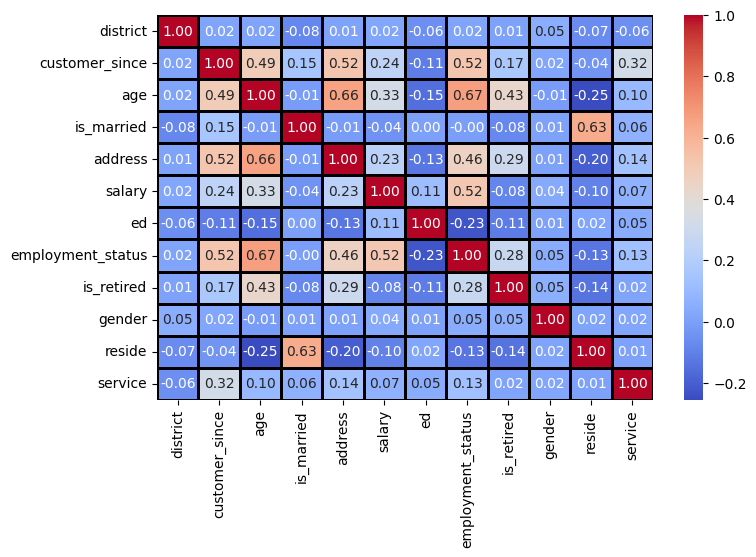

In [19]:
# heatmap of the correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2, linecolor='black')

<Axes: xlabel='count', ylabel='service'>

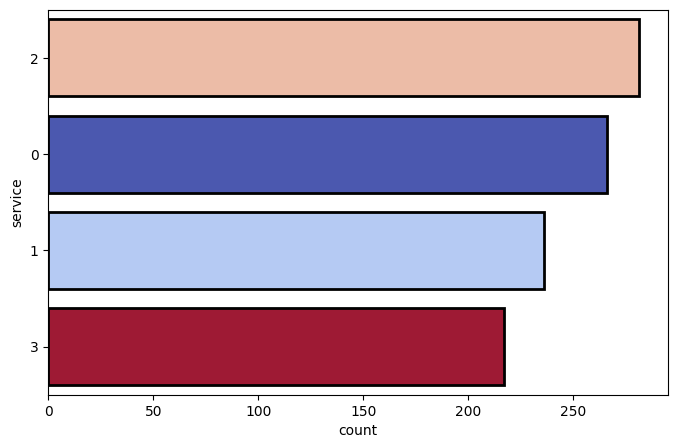

In [20]:
# distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(data=df, y='service', palette='coolwarm', hue='service', legend=False, edgecolor='black', linewidth=2, order=df['service'].value_counts().index)

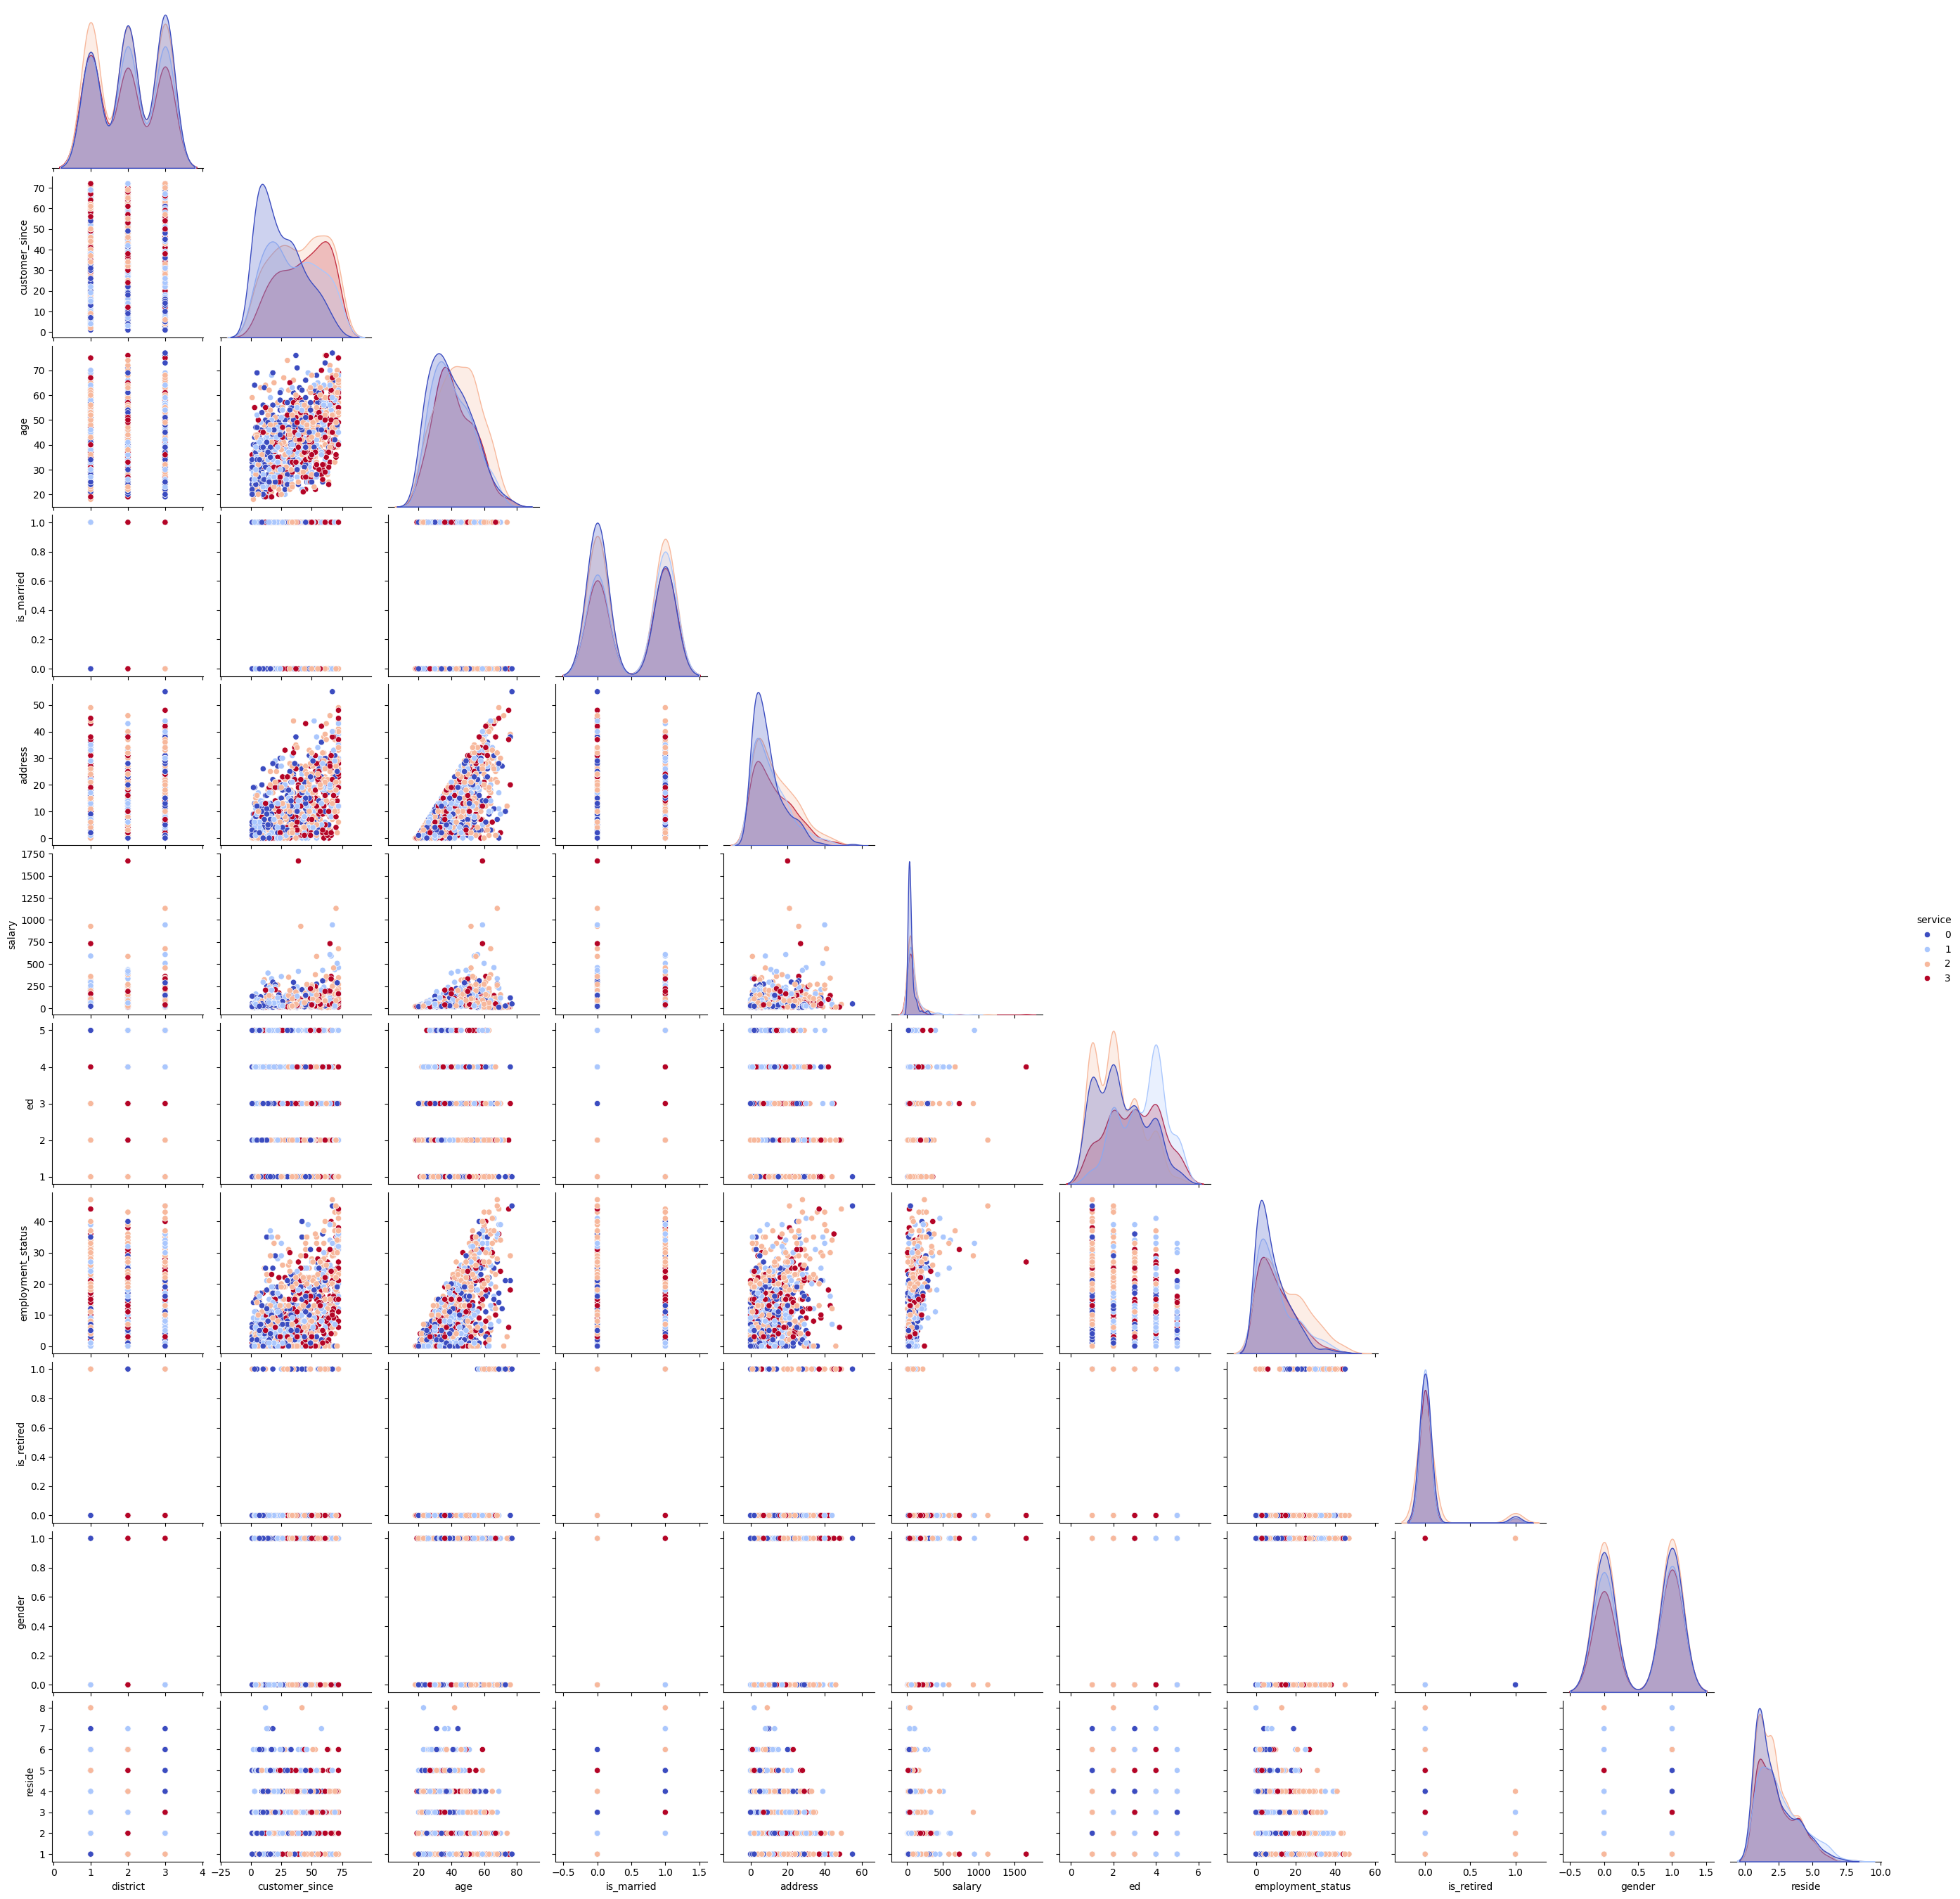

In [21]:
# pairplot so almost all relations can be visualized simultaneously
sns.pairplot(df, hue='service', palette='coolwarm', corner=True, diag_kind='kde')

<Axes: xlabel='age', ylabel='salary'>

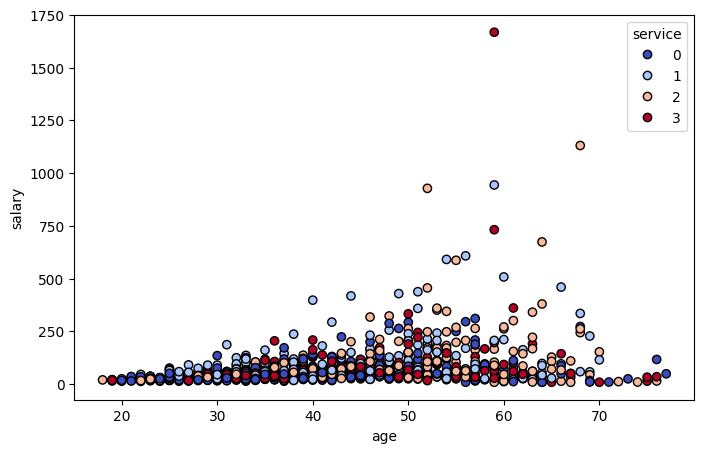

In [22]:
# visualizing salary/age wrt service
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='salary', data=df, hue='service', palette='coolwarm', edgecolor='black', linewidth=1)

<Axes: xlabel='service', ylabel='salary'>

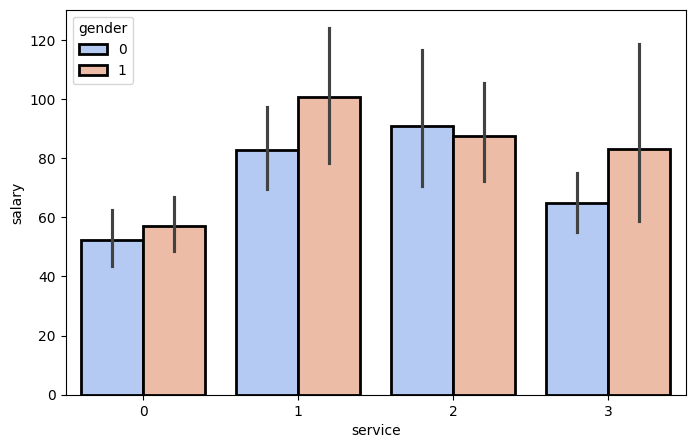

In [23]:
# visualizing salary/service wrt gender
plt.figure(figsize=(8, 5))
sns.barplot(x='service', y='salary', data=df, palette='coolwarm', hue='gender', edgecolor='black', linewidth=2)

<Axes: xlabel='is_married', ylabel='salary'>

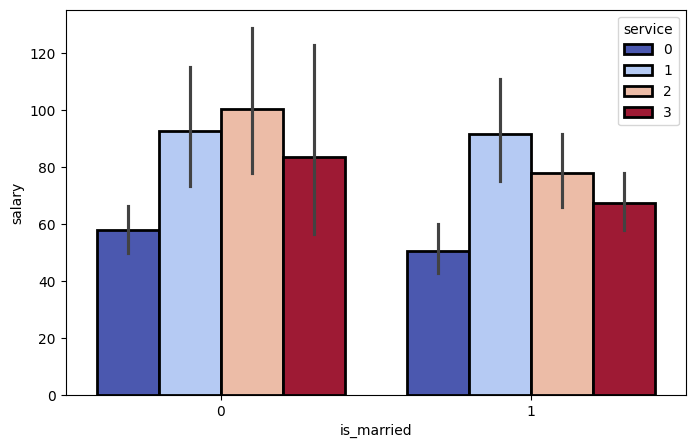

In [24]:
# visualizing salary/is_married wrt service
plt.figure(figsize=(8, 5))
sns.barplot(x='is_married', y='salary', data=df, palette='coolwarm', hue='service', edgecolor='black', linewidth=2)

<Axes: xlabel='age', ylabel='customer_since'>

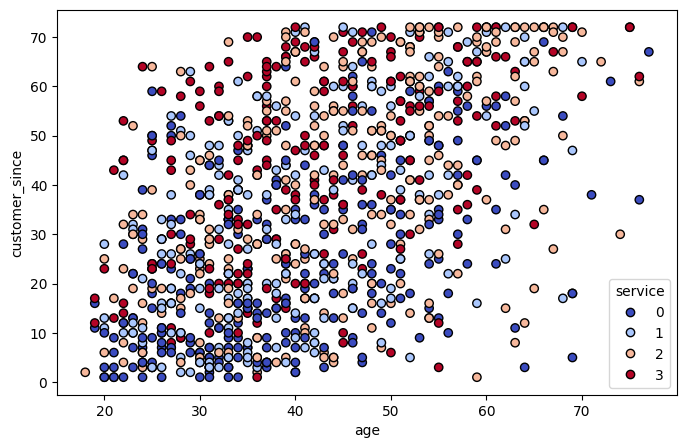

In [25]:
# visualizing customer_since/age wrt service
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='customer_since', data=df, hue='service', palette='coolwarm', edgecolor='black', linewidth=1)

In [ ]:
%pip install scikit-learn

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [27]:
np.random.seed(42)

In [28]:
X = df.drop('service', axis=1)
y = df['service']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

## Model

In [29]:
# distance functions
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def manhattan_distance(a, b):
    return np.sum(np.abs(a - b))

class KNN:
    def __init__(self, k=3, distance_metric='euclidean', weighted=False):
        self.k = k
        self.distance_metric = distance_metric
        self.weighted = weighted
        self.distance_function = euclidean_distance if distance_metric == 'euclidean' else manhattan_distance

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            # distances for x
            distances = [self.distance_function(x, x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            
            if self.weighted:
                k_nearest_distances = [distances[i] for i in k_indices]
                # handling the case where d = 0
                weights = [1 / d if d != 0 else 1e10 for d in k_nearest_distances]
                weighted_votes = {}
                for label, weight in zip(k_nearest_labels, weights):
                    if label in weighted_votes:
                        weighted_votes[label] += weight
                    else:
                        weighted_votes[label] = weight
                predictions.append(max(weighted_votes, key=weighted_votes.get))
                
            else:
                label_counts = {}
                for label in k_nearest_labels:
                    if label in label_counts:
                        label_counts[label] += 1
                    else:
                        label_counts[label] = 1
                predictions.append(max(label_counts, key=label_counts.get))
        return np.array(predictions)

### First, trying to find the best k-value (even though we will be conducting experiments with different k-values).

In [30]:
for k in range(1, 31):
    knn = KNN(k=k)
    knn.fit(X_train.values, y_train.values)
    y_pred = knn.predict(X_test.values)
    print(f'Accuracy for k={k}: {accuracy_score(y_test, y_pred)}')

Accuracy for k=1: 0.3
Accuracy for k=2: 0.3
Accuracy for k=3: 0.315
Accuracy for k=4: 0.315
Accuracy for k=5: 0.305
Accuracy for k=6: 0.3
Accuracy for k=7: 0.345
Accuracy for k=8: 0.31
Accuracy for k=9: 0.295
Accuracy for k=10: 0.305
Accuracy for k=11: 0.325
Accuracy for k=12: 0.315
Accuracy for k=13: 0.3
Accuracy for k=14: 0.315
Accuracy for k=15: 0.36
Accuracy for k=16: 0.355
Accuracy for k=17: 0.345
Accuracy for k=18: 0.38
Accuracy for k=19: 0.365
Accuracy for k=20: 0.355
Accuracy for k=21: 0.365
Accuracy for k=22: 0.34
Accuracy for k=23: 0.365
Accuracy for k=24: 0.37
Accuracy for k=25: 0.36
Accuracy for k=26: 0.365
Accuracy for k=27: 0.355
Accuracy for k=28: 0.355
Accuracy for k=29: 0.35
Accuracy for k=30: 0.37


Let's try k-values: 7, 15, 19 and 25 for this default configuration.

In [31]:
for k in [7, 15, 19, 25]:
    knn = KNN(k=k)
    knn.fit(X_train.values, y_train.values)
    y_pred = knn.predict(X_test.values)
    print(f'Results for k={k}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred, average="weighted")}')
    print(f'Recall: {recall_score(y_test, y_pred, average="weighted")}')
    print()

Results for k=7
Accuracy: 0.345
Precision: 0.343299191374663
Recall: 0.345

Results for k=15
Accuracy: 0.36
Precision: 0.35333136797568165
Recall: 0.36

Results for k=19
Accuracy: 0.365
Precision: 0.3608294874139945
Recall: 0.365

Results for k=25
Accuracy: 0.36
Precision: 0.3515300689534782
Recall: 0.36



In [32]:
metrics_for_19_euclidean = {
    'accuracy': [],
    'precision': [],
    'recall': []
}

knn = KNN(k=19)
knn.fit(X_train.values, y_train.values)
y_pred = knn.predict(X_test.values)
metrics_for_19_euclidean['accuracy'].append(accuracy_score(y_test, y_pred))
metrics_for_19_euclidean['precision'].append(precision_score(y_test, y_pred, average='weighted'))
metrics_for_19_euclidean['recall'].append(recall_score(y_test, y_pred, average='weighted'))

Now let's use a similar approach but for a different distance metric.

In [33]:
for k in range(1, 31):
    knn = KNN(k=k, distance_metric='manhattan')
    knn.fit(X_train.values, y_train.values)
    y_pred = knn.predict(X_test.values)
    print(f'Accuracy for k={k}: {accuracy_score(y_test, y_pred)}')

Accuracy for k=1: 0.285
Accuracy for k=2: 0.285
Accuracy for k=3: 0.295
Accuracy for k=4: 0.305
Accuracy for k=5: 0.3
Accuracy for k=6: 0.31
Accuracy for k=7: 0.29
Accuracy for k=8: 0.3
Accuracy for k=9: 0.325
Accuracy for k=10: 0.325
Accuracy for k=11: 0.38
Accuracy for k=12: 0.355
Accuracy for k=13: 0.375
Accuracy for k=14: 0.35
Accuracy for k=15: 0.365
Accuracy for k=16: 0.345
Accuracy for k=17: 0.365
Accuracy for k=18: 0.37
Accuracy for k=19: 0.355
Accuracy for k=20: 0.355
Accuracy for k=21: 0.375
Accuracy for k=22: 0.365
Accuracy for k=23: 0.37
Accuracy for k=24: 0.365
Accuracy for k=25: 0.37
Accuracy for k=26: 0.385
Accuracy for k=27: 0.36
Accuracy for k=28: 0.385
Accuracy for k=29: 0.375
Accuracy for k=30: 0.355


We can argue getting better results than the former experiments, judging from the high accuracy results for some odd values of k. We can try 11, 13, 21, 29.

In [34]:
for k in [11, 13, 21, 29]:
    knn = KNN(k=k, distance_metric='manhattan')
    knn.fit(X_train.values, y_train.values)
    y_pred = knn.predict(X_test.values)
    print(f'Results for k={k}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred, average="weighted")}')
    print(f'Recall: {recall_score(y_test, y_pred, average="weighted")}')
    print()

Results for k=11
Accuracy: 0.38
Precision: 0.37331468456947997
Recall: 0.38

Results for k=13
Accuracy: 0.375
Precision: 0.3663873063468266
Recall: 0.375

Results for k=21
Accuracy: 0.375
Precision: 0.3638556184236649
Recall: 0.375

Results for k=29
Accuracy: 0.375
Precision: 0.3644942360695785
Recall: 0.375



In [35]:
metrics_for_11_manhattan = {
    'accuracy': [],
    'precision': [],
    'recall': []
}

knn = KNN(k=11, distance_metric='manhattan')
knn.fit(X_train.values, y_train.values)
y_pred = knn.predict(X_test.values)
metrics_for_11_manhattan['accuracy'].append(accuracy_score(y_test, y_pred))
metrics_for_11_manhattan['precision'].append(precision_score(y_test, y_pred, average='weighted'))
metrics_for_11_manhattan['recall'].append(recall_score(y_test, y_pred, average='weighted'))

Now let's get the weights involved. For experimental purposes, only one weighting logic will be tested.

In [36]:
for k in range(1, 31):
    knn = KNN(k=k, weighted=True)
    knn.fit(X_train.values, y_train.values)
    y_pred = knn.predict(X_test.values)
    print(f'Accuracy for k={k}: {accuracy_score(y_test, y_pred)}')

Accuracy for k=1: 0.3
Accuracy for k=2: 0.3
Accuracy for k=3: 0.315
Accuracy for k=4: 0.32
Accuracy for k=5: 0.305
Accuracy for k=6: 0.295
Accuracy for k=7: 0.335
Accuracy for k=8: 0.32
Accuracy for k=9: 0.31
Accuracy for k=10: 0.315
Accuracy for k=11: 0.325
Accuracy for k=12: 0.325
Accuracy for k=13: 0.315
Accuracy for k=14: 0.31
Accuracy for k=15: 0.345
Accuracy for k=16: 0.36
Accuracy for k=17: 0.36
Accuracy for k=18: 0.38
Accuracy for k=19: 0.37
Accuracy for k=20: 0.365
Accuracy for k=21: 0.35
Accuracy for k=22: 0.34
Accuracy for k=23: 0.335
Accuracy for k=24: 0.355
Accuracy for k=25: 0.36
Accuracy for k=26: 0.36
Accuracy for k=27: 0.35
Accuracy for k=28: 0.35
Accuracy for k=29: 0.34
Accuracy for k=30: 0.335


7, 15, 19 and 25 are good chocies of k, for both providing good results and being the same as in the first experiment. Thus, this will be a direct comparison between the first experiment and this one.

In [37]:
for k in [7, 15, 19, 25]:
    knn = KNN(k=k, weighted=True)
    knn.fit(X_train.values, y_train.values)
    y_pred = knn.predict(X_test.values)
    print(f'Results for k={k}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred, average="weighted")}')
    print(f'Recall: {recall_score(y_test, y_pred, average="weighted")}')
    print()

Results for k=7
Accuracy: 0.335
Precision: 0.33375127920859626
Recall: 0.335

Results for k=15
Accuracy: 0.345
Precision: 0.34351996927803385
Recall: 0.345

Results for k=19
Accuracy: 0.37
Precision: 0.3662150282150282
Recall: 0.37

Results for k=25
Accuracy: 0.36
Precision: 0.355606916278558
Recall: 0.36



Comparing those results, we see a slight improvement for the k-value 19, which is actually the best value for both cases.

In [38]:
metrics_for_19_euclidean_weighted = {
    'accuracy': [],
    'precision': [],
    'recall': []
}

knn = KNN(k=19, weighted=True)
knn.fit(X_train.values, y_train.values)
y_pred = knn.predict(X_test.values)
metrics_for_19_euclidean_weighted['accuracy'].append(accuracy_score(y_test, y_pred))
metrics_for_19_euclidean_weighted['precision'].append(precision_score(y_test, y_pred, average='weighted'))
metrics_for_19_euclidean_weighted['recall'].append(recall_score(y_test, y_pred, average='weighted'))

Now it's time for Manhattan distance with weights

In [39]:
for k in range(1, 31):
    knn = KNN(k=k, distance_metric='manhattan', weighted=True)
    knn.fit(X_train.values, y_train.values)
    y_pred = knn.predict(X_test.values)
    print(f'Accuracy for k={k}: {accuracy_score(y_test, y_pred)}')

Accuracy for k=1: 0.285
Accuracy for k=2: 0.285
Accuracy for k=3: 0.295
Accuracy for k=4: 0.305
Accuracy for k=5: 0.3
Accuracy for k=6: 0.315
Accuracy for k=7: 0.29
Accuracy for k=8: 0.28
Accuracy for k=9: 0.32
Accuracy for k=10: 0.335
Accuracy for k=11: 0.36
Accuracy for k=12: 0.345
Accuracy for k=13: 0.355
Accuracy for k=14: 0.345
Accuracy for k=15: 0.36
Accuracy for k=16: 0.345
Accuracy for k=17: 0.36
Accuracy for k=18: 0.36
Accuracy for k=19: 0.355
Accuracy for k=20: 0.35
Accuracy for k=21: 0.34
Accuracy for k=22: 0.34
Accuracy for k=23: 0.345
Accuracy for k=24: 0.35
Accuracy for k=25: 0.36
Accuracy for k=26: 0.365
Accuracy for k=27: 0.36
Accuracy for k=28: 0.37
Accuracy for k=29: 0.36
Accuracy for k=30: 0.35


Let's test for the same k-values as in the second experiment.

In [40]:
for k in [11, 13, 21, 29]:
    knn = KNN(k=k, distance_metric='manhattan', weighted=True)
    knn.fit(X_train.values, y_train.values)
    y_pred = knn.predict(X_test.values)
    print(f'Results for k={k}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred, average="weighted")}')
    print(f'Recall: {recall_score(y_test, y_pred, average="weighted")}')
    print()

Results for k=11
Accuracy: 0.36
Precision: 0.3548608299595142
Recall: 0.36

Results for k=13
Accuracy: 0.355
Precision: 0.34570669836302365
Recall: 0.355

Results for k=21
Accuracy: 0.34
Precision: 0.3307832512315271
Recall: 0.34

Results for k=29
Accuracy: 0.36
Precision: 0.3513620154665833
Recall: 0.36



For the former best value, we see a minor decrease in terms of accuracy. Weighting (or maybe just this weighting logic) does not seem like a good idea for this case.

In [41]:
metrics_for_11_manhattan_weighted = {
    'accuracy': [],
    'precision': [],
    'recall': []
}

knn = KNN(k=11, distance_metric='manhattan', weighted=True)
knn.fit(X_train.values, y_train.values)
y_pred = knn.predict(X_test.values)
metrics_for_11_manhattan_weighted['accuracy'].append(accuracy_score(y_test, y_pred))
metrics_for_11_manhattan_weighted['precision'].append(precision_score(y_test, y_pred, average='weighted'))
metrics_for_11_manhattan_weighted['recall'].append(recall_score(y_test, y_pred, average='weighted'))

Now it's time to compare the best results achieved for all experiments.

Text(0, 0.5, 'Accuracy')

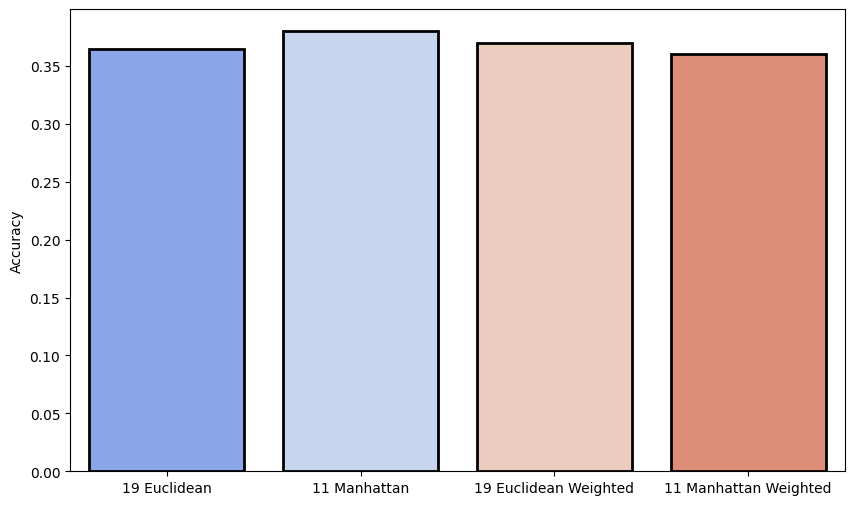

In [42]:
# visualizing all 4 accuracy values
plt.figure(figsize=(10, 6))

x = ['19 Euclidean', '11 Manhattan', '19 Euclidean Weighted', '11 Manhattan Weighted']
y = [metrics_for_19_euclidean['accuracy'][0], metrics_for_11_manhattan['accuracy'][0], metrics_for_19_euclidean_weighted['accuracy'][0], metrics_for_11_manhattan_weighted['accuracy'][0]]

sns.barplot(x=x, y=y, palette='coolwarm', hue=x, edgecolor='black', linewidth=2)
plt.ylabel('Accuracy')

Text(0, 0.5, 'Precision')

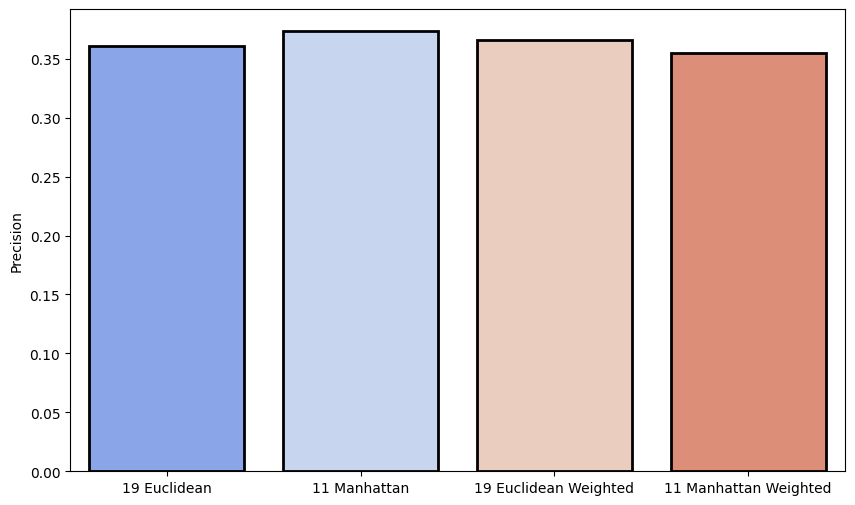

In [43]:
# visualizing all 4 precision values
plt.figure(figsize=(10, 6))

x = ['19 Euclidean', '11 Manhattan', '19 Euclidean Weighted', '11 Manhattan Weighted']
y = [metrics_for_19_euclidean['precision'][0], metrics_for_11_manhattan['precision'][0], metrics_for_19_euclidean_weighted['precision'][0], metrics_for_11_manhattan_weighted['precision'][0]]

sns.barplot(x=x, y=y, palette='coolwarm', hue=x, edgecolor='black', linewidth=2)
plt.ylabel('Precision')

Text(0, 0.5, 'Recall')

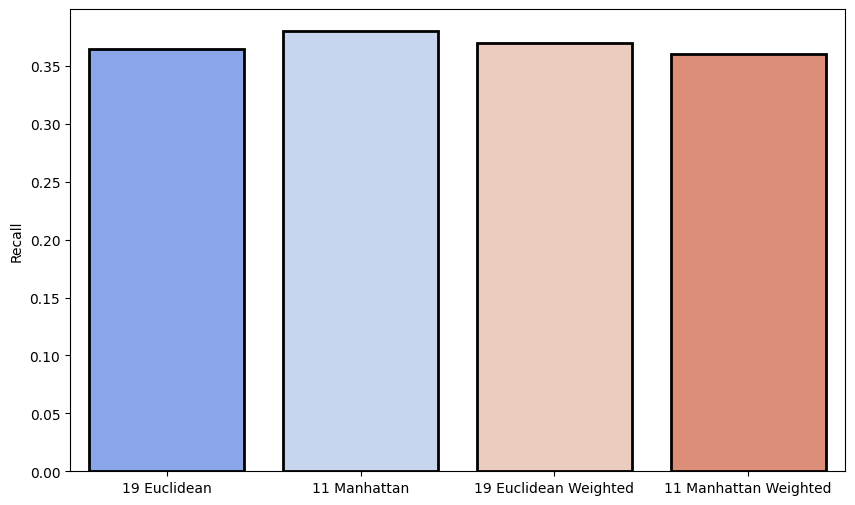

In [44]:
# visualizing all 4 recall values
plt.figure(figsize=(10, 6))

x = ['19 Euclidean', '11 Manhattan', '19 Euclidean Weighted', '11 Manhattan Weighted']
y = [metrics_for_19_euclidean['recall'][0], metrics_for_11_manhattan['recall'][0], metrics_for_19_euclidean_weighted['recall'][0], metrics_for_11_manhattan_weighted['recall'][0]]

sns.barplot(x=x, y=y, palette='coolwarm', hue=x, edgecolor='black', linewidth=2)
plt.ylabel('Recall')

Judging from the all results, the non-weighted 11-NN model with Manhattan Distance seems to be giving a slightly better performance for all metrics. This hugely depends to (and will change with respect to) dataset's size, encoding type (one-hot might be better), whether scaling/normalization being applied.

## Processes on the Scaled Data

Now, let's conduct some more advanced experiments. We will be using normalization and one-hot encoding, and see if we get any performance improvements.

In [45]:
def min_max_scaler(X):
    X_min = np.min(X, axis=0)
    X_max = np.max(X, axis=0)
    return (X - X_min) / (X_max - X_min)

In [46]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[['customer_since', 'age', 'salary']] = min_max_scaler(X_train[['customer_since', 'age', 'salary']])
X_test_scaled[['customer_since', 'age', 'salary']] = min_max_scaler(X_test[['customer_since', 'age', 'salary']])

In [47]:
X_train_scaled['is_married_No'] = X_train_scaled['is_married'].apply(lambda x: 1 if x == 0 else 0)
X_train_scaled['is_married_Yes'] = X_train_scaled['is_married'].apply(lambda x: 1 if x == 1 else 0)
X_train_scaled['is_retired_No'] = X_train_scaled['is_retired'].apply(lambda x: 1 if x == 0 else 0)
X_train_scaled['is_retired_Yes'] = X_train_scaled['is_retired'].apply(lambda x: 1 if x == 1 else 0)
X_train_scaled['gender_F'] = X_train_scaled['gender'].apply(lambda x: 1 if x == 0 else 0)
X_train_scaled['gender_M'] = X_train_scaled['gender'].apply(lambda x: 1 if x == 1 else 0)

X_train_scaled.drop(['is_married', 'is_retired', 'gender'], axis=1, inplace=True)

In [48]:
X_test_scaled['is_married_No'] = X_test_scaled['is_married'].apply(lambda x: 1 if x == 0 else 0)
X_test_scaled['is_married_Yes'] = X_test_scaled['is_married'].apply(lambda x: 1 if x == 1 else 0)
X_test_scaled['is_retired_No'] = X_test_scaled['is_retired'].apply(lambda x: 1 if x == 0 else 0)
X_test_scaled['is_retired_Yes'] = X_test_scaled['is_retired'].apply(lambda x: 1 if x == 1 else 0)
X_test_scaled['gender_F'] = X_test_scaled['gender'].apply(lambda x: 1 if x == 0 else 0)
X_test_scaled['gender_M'] = X_test_scaled['gender'].apply(lambda x: 1 if x == 1 else 0)

X_test_scaled.drop(['is_married', 'is_retired', 'gender'], axis=1, inplace=True)

Now since the data has changed, we should do the same things again.

In [49]:
for k in range(1, 31):
    knn = KNN(k=k)
    knn.fit(X_train_scaled.values, y_train.values)
    y_pred = knn.predict(X_test_scaled.values)
    print(f'Accuracy for k={k}: {accuracy_score(y_test, y_pred)}')

Accuracy for k=1: 0.27
Accuracy for k=2: 0.27
Accuracy for k=3: 0.26
Accuracy for k=4: 0.31
Accuracy for k=5: 0.265
Accuracy for k=6: 0.26
Accuracy for k=7: 0.305
Accuracy for k=8: 0.295
Accuracy for k=9: 0.31
Accuracy for k=10: 0.29
Accuracy for k=11: 0.315
Accuracy for k=12: 0.295
Accuracy for k=13: 0.3
Accuracy for k=14: 0.335
Accuracy for k=15: 0.325
Accuracy for k=16: 0.325
Accuracy for k=17: 0.34
Accuracy for k=18: 0.35
Accuracy for k=19: 0.38
Accuracy for k=20: 0.365
Accuracy for k=21: 0.365
Accuracy for k=22: 0.39
Accuracy for k=23: 0.36
Accuracy for k=24: 0.375
Accuracy for k=25: 0.37
Accuracy for k=26: 0.37
Accuracy for k=27: 0.345
Accuracy for k=28: 0.355
Accuracy for k=29: 0.375
Accuracy for k=30: 0.34


We don't seem to be getting much better results. Let's try other configurations as well.

In [50]:
for k in range(1, 31):
    knn = KNN(k=k, distance_metric='manhattan')
    knn.fit(X_train.values, y_train.values)
    y_pred = knn.predict(X_test.values)
    print(f'Accuracy for k={k}: {accuracy_score(y_test, y_pred)}')

Accuracy for k=1: 0.285
Accuracy for k=2: 0.285
Accuracy for k=3: 0.295
Accuracy for k=4: 0.305
Accuracy for k=5: 0.3
Accuracy for k=6: 0.31
Accuracy for k=7: 0.29
Accuracy for k=8: 0.3
Accuracy for k=9: 0.325
Accuracy for k=10: 0.325
Accuracy for k=11: 0.38
Accuracy for k=12: 0.355
Accuracy for k=13: 0.375
Accuracy for k=14: 0.35
Accuracy for k=15: 0.365
Accuracy for k=16: 0.345
Accuracy for k=17: 0.365
Accuracy for k=18: 0.37
Accuracy for k=19: 0.355
Accuracy for k=20: 0.355
Accuracy for k=21: 0.375
Accuracy for k=22: 0.365
Accuracy for k=23: 0.37
Accuracy for k=24: 0.365
Accuracy for k=25: 0.37
Accuracy for k=26: 0.385
Accuracy for k=27: 0.36
Accuracy for k=28: 0.385
Accuracy for k=29: 0.375
Accuracy for k=30: 0.355


In [51]:
for k in range(1, 31):
    knn = KNN(k=k, weighted=True)
    knn.fit(X_train.values, y_train.values)
    y_pred = knn.predict(X_test.values)
    print(f'Accuracy for k={k}: {accuracy_score(y_test, y_pred)}')

Accuracy for k=1: 0.3
Accuracy for k=2: 0.3
Accuracy for k=3: 0.315
Accuracy for k=4: 0.32
Accuracy for k=5: 0.305
Accuracy for k=6: 0.295
Accuracy for k=7: 0.335
Accuracy for k=8: 0.32
Accuracy for k=9: 0.31
Accuracy for k=10: 0.315
Accuracy for k=11: 0.325
Accuracy for k=12: 0.325
Accuracy for k=13: 0.315
Accuracy for k=14: 0.31
Accuracy for k=15: 0.345
Accuracy for k=16: 0.36
Accuracy for k=17: 0.36
Accuracy for k=18: 0.38
Accuracy for k=19: 0.37
Accuracy for k=20: 0.365
Accuracy for k=21: 0.35
Accuracy for k=22: 0.34
Accuracy for k=23: 0.335
Accuracy for k=24: 0.355
Accuracy for k=25: 0.36
Accuracy for k=26: 0.36
Accuracy for k=27: 0.35
Accuracy for k=28: 0.35
Accuracy for k=29: 0.34
Accuracy for k=30: 0.335


In [52]:
for k in range(1, 31):
    knn = KNN(k=k, distance_metric='manhattan', weighted=True)
    knn.fit(X_train.values, y_train.values)
    y_pred = knn.predict(X_test.values)
    print(f'Accuracy for k={k}: {accuracy_score(y_test, y_pred)}')

Accuracy for k=1: 0.285
Accuracy for k=2: 0.285
Accuracy for k=3: 0.295
Accuracy for k=4: 0.305
Accuracy for k=5: 0.3
Accuracy for k=6: 0.315
Accuracy for k=7: 0.29
Accuracy for k=8: 0.28
Accuracy for k=9: 0.32
Accuracy for k=10: 0.335
Accuracy for k=11: 0.36
Accuracy for k=12: 0.345
Accuracy for k=13: 0.355
Accuracy for k=14: 0.345
Accuracy for k=15: 0.36
Accuracy for k=16: 0.345
Accuracy for k=17: 0.36
Accuracy for k=18: 0.36
Accuracy for k=19: 0.355
Accuracy for k=20: 0.35
Accuracy for k=21: 0.34
Accuracy for k=22: 0.34
Accuracy for k=23: 0.345
Accuracy for k=24: 0.35
Accuracy for k=25: 0.36
Accuracy for k=26: 0.365
Accuracy for k=27: 0.36
Accuracy for k=28: 0.37
Accuracy for k=29: 0.36
Accuracy for k=30: 0.35


Again, not visible improvements. This might be caused by the size of the dataset, 1000 rows is relatively small. One last experiment will be to use a train/validation/test split with one of the former configurations to really squeeze our options. 

In [62]:
X_ = df.drop('service', axis=1).values
y_ = df['service'].values

X_train, X_temp, y_train, y_temp = train_test_split(X_, y_, test_size=0.4, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [63]:
knn = KNN(k=3, weighted=True)
knn.fit(X_train, y_train)

In [64]:
for k in range(1, 31):
    knn = KNN(k=k, weighted=True)
    knn.fit(X_train, y_train)
    y_val_pred = knn.predict(X_val)
    print(f'Validation Accuracy for k={k}: {accuracy_score(y_val, y_val_pred)}')

Validation Accuracy for k=1: 0.325
Validation Accuracy for k=2: 0.325
Validation Accuracy for k=3: 0.3
Validation Accuracy for k=4: 0.325
Validation Accuracy for k=5: 0.315
Validation Accuracy for k=6: 0.32
Validation Accuracy for k=7: 0.32
Validation Accuracy for k=8: 0.315
Validation Accuracy for k=9: 0.315
Validation Accuracy for k=10: 0.35
Validation Accuracy for k=11: 0.335
Validation Accuracy for k=12: 0.345
Validation Accuracy for k=13: 0.35
Validation Accuracy for k=14: 0.335
Validation Accuracy for k=15: 0.345
Validation Accuracy for k=16: 0.325
Validation Accuracy for k=17: 0.315
Validation Accuracy for k=18: 0.33
Validation Accuracy for k=19: 0.34
Validation Accuracy for k=20: 0.34
Validation Accuracy for k=21: 0.345
Validation Accuracy for k=22: 0.33
Validation Accuracy for k=23: 0.32
Validation Accuracy for k=24: 0.32
Validation Accuracy for k=25: 0.33
Validation Accuracy for k=26: 0.32
Validation Accuracy for k=27: 0.325
Validation Accuracy for k=28: 0.325
Validation Accu

In [65]:
# let's use 21 
X_train_val = np.concatenate((X_train, X_val), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)

knn = KNN(k=21, weighted=True)
knn.fit(X_train_val, y_train_val)

y_test_pred = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test set accuracy: {test_accuracy}')

Test set accuracy: 0.36
